In [187]:
'''Cost Function:
Cost or Loss function is used for parameter estimation. It is typically the difference between
the estimated and true values of a data instance. Here it is the mean squared error 
over the entire dataset.
''' 

'Cost Function:\nCost or Loss function is used for parameter estimation. It is typically the difference between\nthe estimated and true values of a data instance. Here it is the mean squared error \nover the entire dataset.\n'

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [189]:
# Select the dataset  you wish to train
#data = pd.read_csv('~/winequality-white.csv',  sep=';')    
#data = pd.read_csv('~/winequality-red.csv', sep=';')      
data = pd.read_csv('~/data.csv')                         
#data = (data - data.mean())/data.std()                      # Normalising the data

In [202]:
#Pre -- Processing 
last_col = data.shape[1]
X = data.iloc[:,0:last_col-1]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
for_y = data.shape[1]
y = data.iloc[:,for_y-1:].values 
# Random Initialization
#th = np.random.randn(1,last_col)
#on = np.ones(last_col)
theta = np.zeros([1, last_col])
trans_theta = np.transpose(theta)
alpha = 0.00001
iters = 10000

 

In [191]:
#Cost function :
def Cost_function(X,y,theta):
    mul = np.matmul(X, theta)
    summation = np.power((mul - y),2)
    return np.sum(summation)/(2 * len(X))

In [192]:
# Gradient Descent Calc :
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        mul = np.matmul(X, theta)
        theta = theta - (alpha/len(X)) * np.sum(X * (mul - y), axis=0)
        cost[i] = Cost_function(X, y, theta)
    return theta,cost
    


[5469.67525728 5335.18387683 5207.33910909 ...  110.1192904   110.11924456
  110.11919881]
final cost is:  110.11919880892862


ValueError: Input passed into argument "'y1'"is not 1-dimensional.

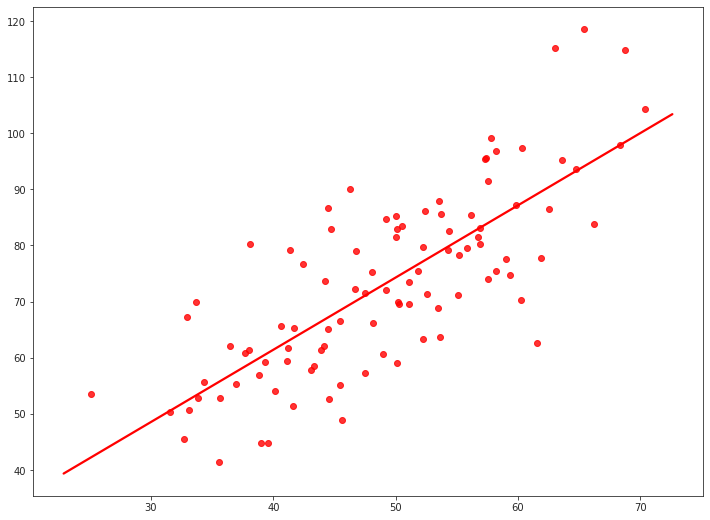

In [200]:
# Execution (or ) Running 
g, cost = gradientDescent(X,y,trans_theta,iters,alpha)
print(cost)
finalCost = Cost_function(X,y,g)
print('final cost is: ',finalCost)
X_reshape=np.delete(X,[0],1)
#plt.scatter(X_reshape,y,color = 'blue')
sns.set_style('ticks')
sns.regplot(X_reshape,y,color = 'red')
sns.despine() 



Text(0.5, 1.0, 'Error vs. Training Epoch')

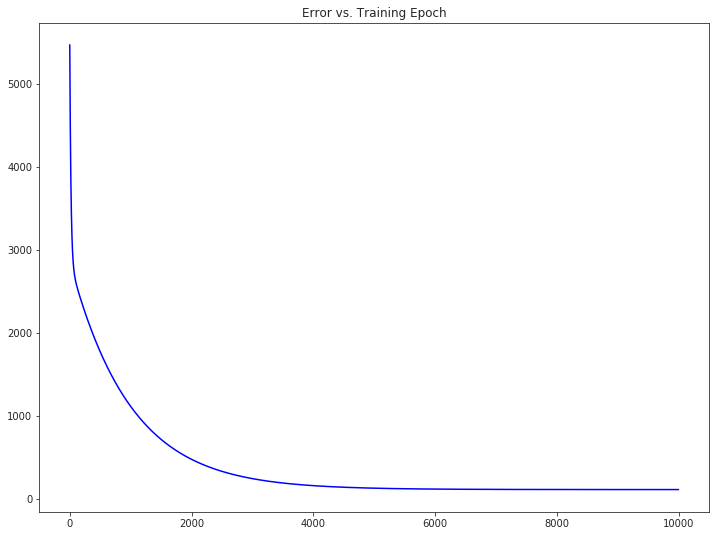

In [201]:
# Plotting the error
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'b')  
ax.set_title('Error vs. Training Epoch') 



In [ ]:
'''Procedure
Wrote two individual functions:
1. Cost Function
2. Gradient Descent

We can also split the dataset into train and test.
Calculation of derivative can be seen in line 175.
'''

In [ ]:
'''
Varying the learning rate varies the loss.
Here different learning rates were tested.
Out of which if the learning rate becoming high memory overflow is happening( Have to read 
more about that)
Most probably the learning rates of the order less than 10^(-3) were suitable with greater 
than 5000 iterations.
'''